<a href="https://colab.research.google.com/github/Hritikrai55/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis___Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

##Android is the dominant mobile operating system today with about 85% of all mobile devices running Google’s OS. The Google Play Store is the largest and most popular Android app store.
##The purpose of our project was to gather and analyze detailed information on apps in the Google Play Store in order to provide insights on app features and the current state of the Android app market.
###The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
###Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
###Explore and analyze the data to discover key factors responsible for app engagement and success.

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from matplotlib import rcParams

In [212]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [213]:
#Here we just read the data frame
df1=pd.read_csv('/content/drive/MyDrive/EDA Project/Play Store Data.csv')


In [214]:
#It will show by default 5 data of our 1st data frame
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [215]:
df1.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


## Description of App Dataset columns
App : The name of the app in the Play Store

Category : The category of the app in the Play Store

Rating : The rating of the app in the Play Store

Reviews : The number of reviews of the app

Size : The size of the app

Install : The number of installs of the app

Type : The type of the app (Free/Paid)

The price of the app (0 if it is Free)

Content Rating :The appropiate target audience of the app

Genres: The genre of the app

Last Updated : The date when the app was last updated

Current Ver : The current version of the app

Android Ver : The minimum Android version required to run the app

In [216]:
# Different types of Category
x=df1['Category'].unique()
print('Total no of category of app present in playstore is:-',len(x))

Total no of category of app present in playstore is:- 34


In [217]:
# To get the no. of rows and columns
df1.shape

(10841, 13)

In [218]:
#Informatation of app dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [219]:
df1[df1['Type'] == 'Paid']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157k,100+,Paid,$0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,$7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,$16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,"10,000+",Paid,$1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


By diagnosing the data frame, we know that:






































































There are 13 columns of properties with 10841 rows of data.

Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'

Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.

Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.

Values of column 'Price' are strings representing price with symbol '$'.

Hence, we will need to do some data cleaning.

## Data cleaning and change the datatypes 

In [220]:
#Convert install coloum string to int in install price and review

def convert_int(x):
    if isinstance(x, int):
        return x
    x = str(x)
    x = x.replace(',', '')
    x = x.replace('+', '')
    x = x.replace('M', '')
    x = x.replace('k', '')
    x = x.replace('$', '')
    if x == 'Free' or x == 'Varies with device' or x == 'Everyone':
        return 0
    else:
        return int(float(x))


In [221]:
#Converting installs,price,reviews to int value for better calculations
df1['Installs']=df1['Installs'].apply(convert_int)
df1['Size_int']=df1['Size'].apply(convert_int)
df1['Price']=df1['Price'].apply(convert_int)
df1['Reviews']=df1['Reviews'].apply(convert_int)

In [222]:
#convert size due to size divided into multiple catagory so we convert into to same format(mb=1024k, k=mb/1024)
def convert_int2(x):
    x=x.lower()
   
    if x=='varies with device':
        x=0
    else:
        if 'm' in x:
            
            x=x+','+'+'+'m'+'$'  
            x=x.replace(',','')
            x=x.replace('+','')
            x=x.replace('m','')
            x=x.replace('k','')
            x=x.replace('$','')
            x=eval(x)
        elif 'k' in x :
            
            x=x+','+'+'+'k'+'$'  
            x=x.replace(',','')
            x=x.replace('+','')
            x=x.replace('M','')
            x=x.replace('k','')
            x=x.replace('$','')
            x=eval(x)/1024
        else:
            x=-100
  
    return x
df1['Size_int']=df1['Size'].apply(convert_int2)

In [223]:
# Remove wich app reating is more than 5 un used entry
r=df1[df1['Rating']>5].index 

df1=df1.drop(r)

In [224]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  int64  
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Size_int        10840 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 1.2+ MB


In [225]:
# check on null values
df1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Size_int             0
dtype: int64

##Remove null values
Here, we realized that there are 1474 rows having null values under column 'Rating'. Hence, we decided to replace the null values with median of overall 'Rating' values.

median=In statistics and probability theory, the median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution. For a data set, it may be thought of as "the middle" value


In [226]:
x=df1['Rating'].median()
df1['Rating']=df1['Rating'].fillna(x)

In [227]:
df1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
Size_int          0
dtype: int64

In [228]:
#Remove the app which has contain no type

y=df1[df1['Type'].isna()].index
df1=df1.drop(index=y)
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
Size_int          0
dtype: int64

##Q1.Based on the highest review we created the data set and change it.


In [229]:
#Based on the highest review we created the data set and change it

df2=pd.DataFrame(df1)
df2.sort_values(by='Reviews',ascending=False, inplace=True)

df2=df2.drop_duplicates(subset=['App'])
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_int
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,0.0
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,0.0
1879,Clash of Clans,GAME,4.6,44893888,98M,100000000,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,Doctors Care,MEDICAL,4.3,0,25M,10,Free,0,Everyone,Medical,"July 24, 2018",2.0.0 (35717),4.4 and up,25.0
2439,Weill Cornell Medicine,MEDICAL,4.3,0,19M,50,Free,0,Everyone,Medical,"July 16, 2018",1.0.10,5.0 and up,19.0
2438,Pediatric Emergency Guide,MEDICAL,4.3,0,3.8M,100,Free,0,Everyone,Medical,"July 9, 2018",3.1.1,4.4 and up,3.8
2437,Dare EMS Protocols,MEDICAL,4.3,0,20M,10,Free,0,Everyone 10+,Medical,"July 26, 2018",1.8.3,4.1 and up,20.0


##Q2.Statistical information of the dataframe

In [230]:
# check on statistical information of the dataframe
df2.describe()

,Rating,Reviews,Installs,Price,Size_int
count,9658.000000,9.658000e+03,9.658000e+03,9658.000000,9658.000000
mean,4.192452,2.168266e+05,7.798978e+06,1.028163,17.806603
std,0.496080,1.831524e+06,5.377245e+07,16.799466,21.496742
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000,2.900000
50%,4.300000,9.695000e+02,1.000000e+05,0.000000,9.100000
75%,4.500000,2.945775e+04,1.000000e+06,0.000000,25.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,100.000000


# Data visualization

### V1: No. of app from category wise?

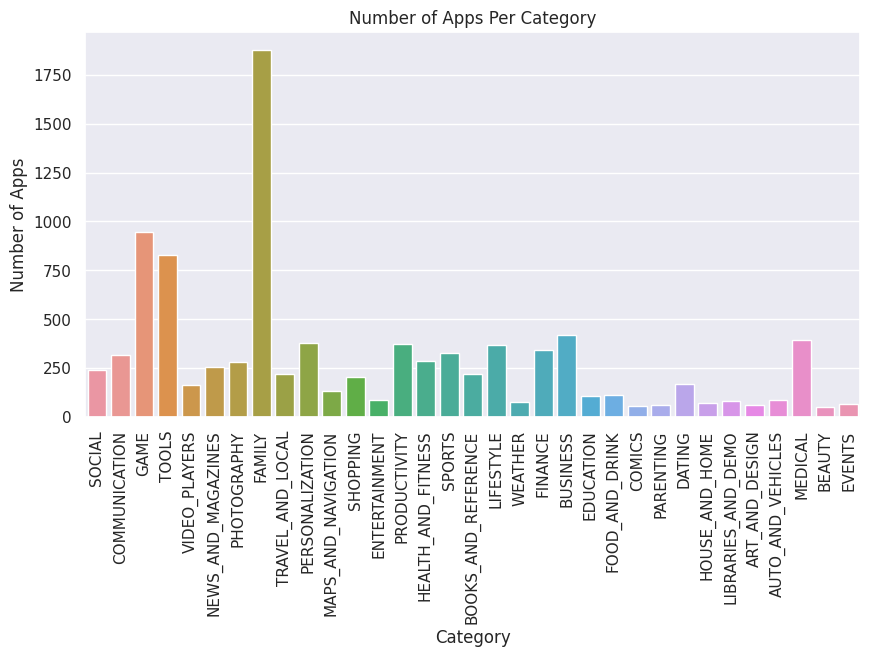

In [231]:
# get the number of apps for each category
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=df2)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

Here we see that there are highest no of app from family catagory.In second there is game 

###Q3. Count total no. of installation category wise

In [232]:
#Count total no. of installation category basis
users=df2.groupby(['Category'])['Installs'].sum().reset_index()
users.head()

,Category,Installs
0,ART_AND_DESIGN,113238100
1,AUTO_AND_VEHICLES,53130211
2,BEAUTY,27197050
3,BOOKS_AND_REFERENCE,1665969576
4,BUSINESS,697164865


In [233]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 2544 to 8019
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Reviews         9658 non-null   int64  
 4   Size            9658 non-null   object 
 5   Installs        9658 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9658 non-null   int64  
 8   Content Rating  9658 non-null   object 
 9   Genres          9658 non-null   object 
 10  Last Updated    9658 non-null   object 
 11  Current Ver     9650 non-null   object 
 12  Android Ver     9656 non-null   object 
 13  Size_int        9658 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 1.1+ MB


##V2.Highest user/installed catagory

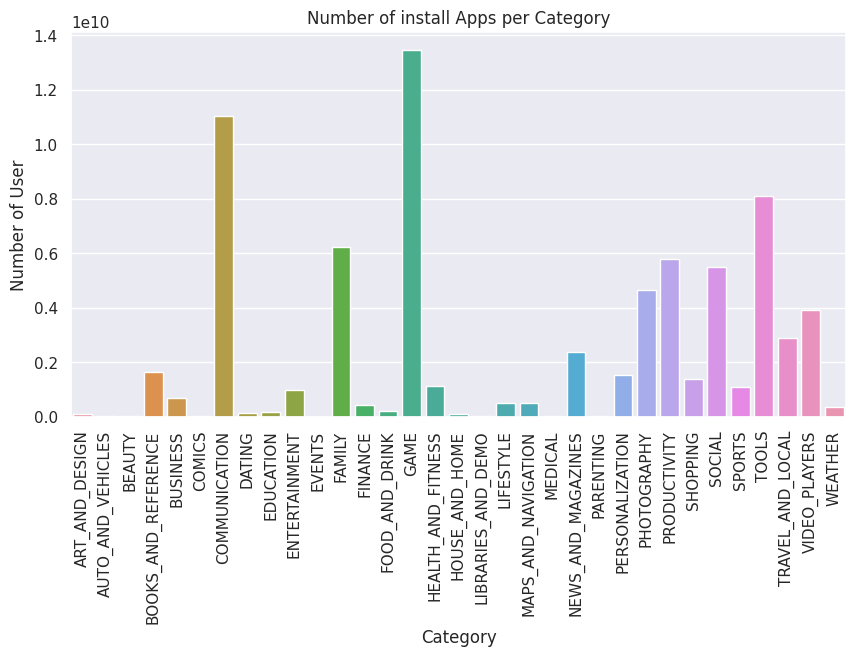

In [234]:
#highest no of user/installed app cataory wise
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.barplot(x='Category',y='Installs',data=users)
plt.title('Number of install Apps per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of User')
plt.show()

As for the above graph we colclude that most user showing there intrest in Gaming app and after game people show there intrest in communication apps. The highest install app is Game app and communicatation app is in second

##V3.Rating distributaion?

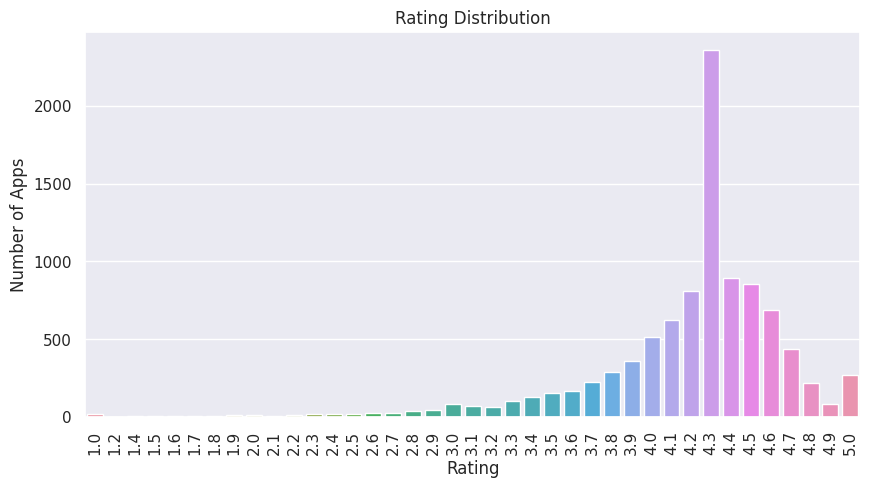

In [235]:
# Show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=df2)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

##V4. Rating given by user from each Category

Avg rating:- 4.192451853385794


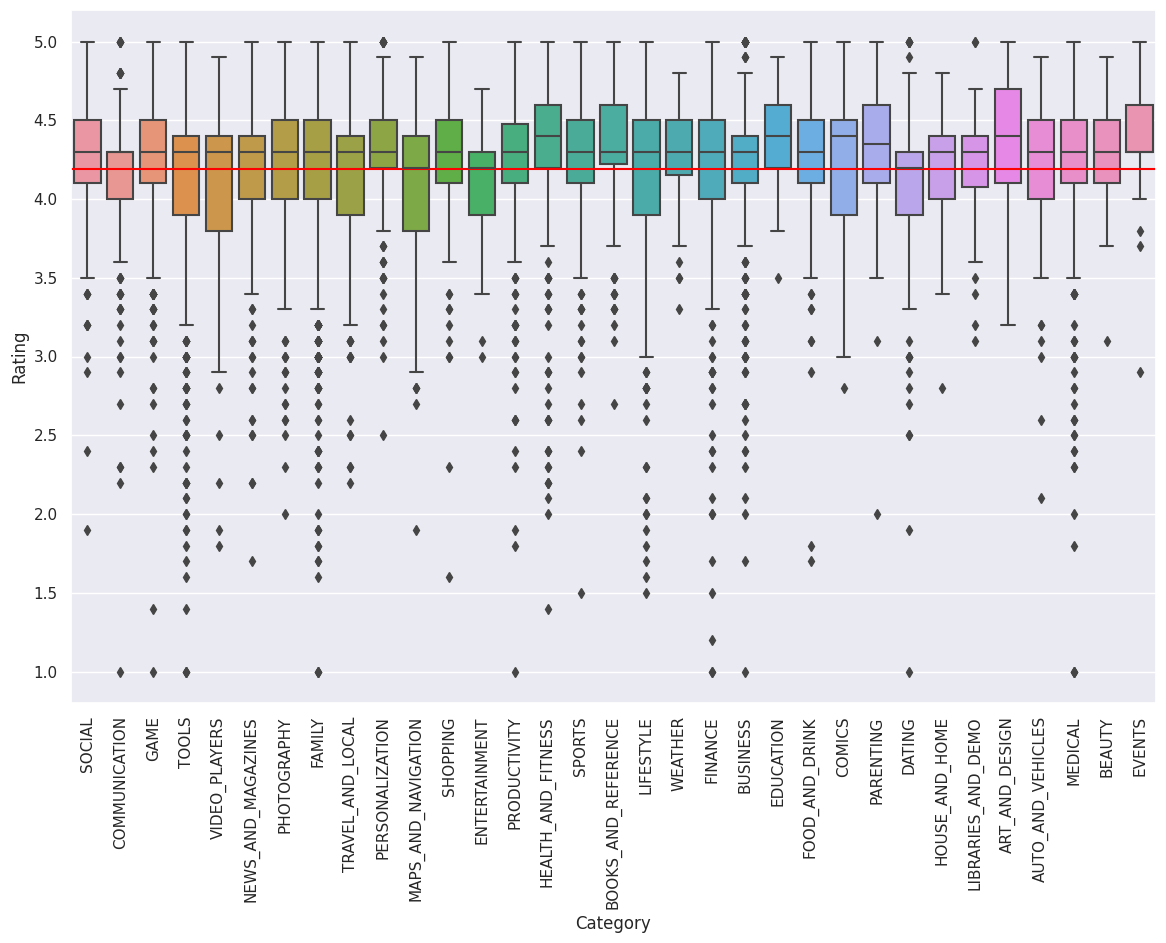

In [236]:
#Compare the app catagory wise with rating (which category get more rating with avg. and which is low)
plt.figure(figsize=(14,9))

val = sns.boxplot(data=df2, x="Category", y="Rating")
val.axhline(df2['Rating'].mean(),ls="-",color="red")
x=plt.xticks(rotation=90)
print('Avg rating:-',df2['Rating'].mean())

Red Line is the Average of rating

Performance of all app categories is mostly Decent. Highest quality apps with 50% apps with a rating higher than 4.5 are Health and Fitness and Book and Reference app. This is considered to be extremely high!

However, the apps in Dating category having lower rating than the average ratings is 50%.

The game category app more app rated from compare to avg and from Health and Fitness almost all app rated more than avg this is consider as positive feedback of those catagory.

 

##Q4.Grouping by rating

In [237]:
#It show the corelatation between how rating affected the other factor or not
rating=df2.groupby(['Rating']).sum().reset_index()
rating.head()

,Rating,Reviews,Installs,Price,Size_int
0,1.0,28,5170,3,228.8
1,1.2,44,1000,0,27.0
2,1.4,98,7000,0,20.2
3,1.5,61,1105,0,54.0
4,1.6,691,152000,0,64.6


##V5.Other catagory corelatation with rating

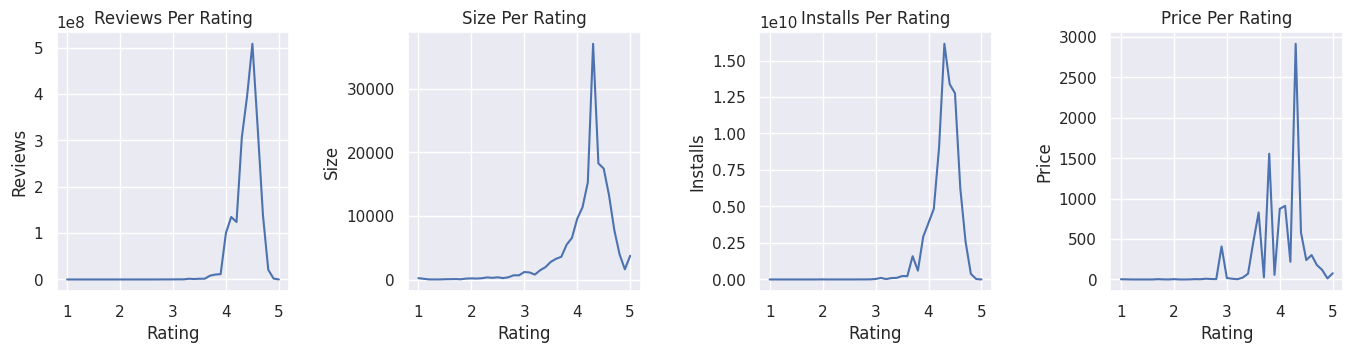

In [238]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

axes[0].plot(rating['Rating'], rating['Reviews'])
#axes[0].sns.jointplot(y ='Size', x ='Rating', data = df, kind ='hex')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')

axes[1].plot(rating['Rating'], rating['Size_int'] )
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')

axes[2].plot(rating['Rating'], rating['Installs'] )
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs')
axes[2].set_title('Installs Per Rating')

axes[3].plot(rating['Rating'], rating['Price'] )
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')

plt.tight_layout(pad=2)
plt.show()

From the above graphs, we found that most of the apps whose rating range is in between 4.0 - 4.7 are having high amount of reviews, size, and installs. In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in term of pricing even at the range of high rating.

##V6.Different types of app on based on price(free/paid)

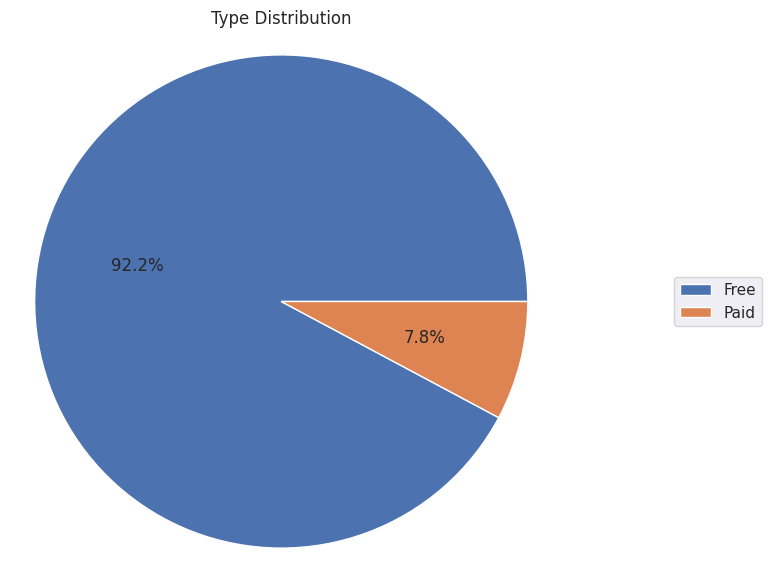

In [239]:
# application type distribution
#Here we use count plot because here we count a paricular coloum comparison
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

number_of_apps = df2['Type'].value_counts()

labels = number_of_apps.index
sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.title('Type Distribution')
plt.show()

From the plot we can imply that majority of the apps in the Play Store are Free apps.

##V7.Content wise distribution app

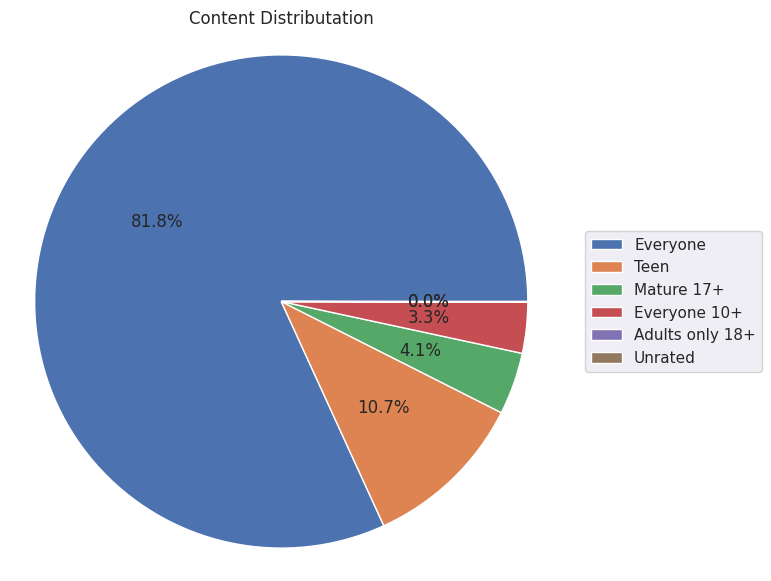

In [240]:
# here we just see diffent type of content present in playstore
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

number_of_apps = df2['Content Rating'].value_counts()

labels = number_of_apps.index
sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.title('Content Distributation')
plt.show()

Here we can see most of content available for Everyone.

## V8. Corelatation graph (IMP)

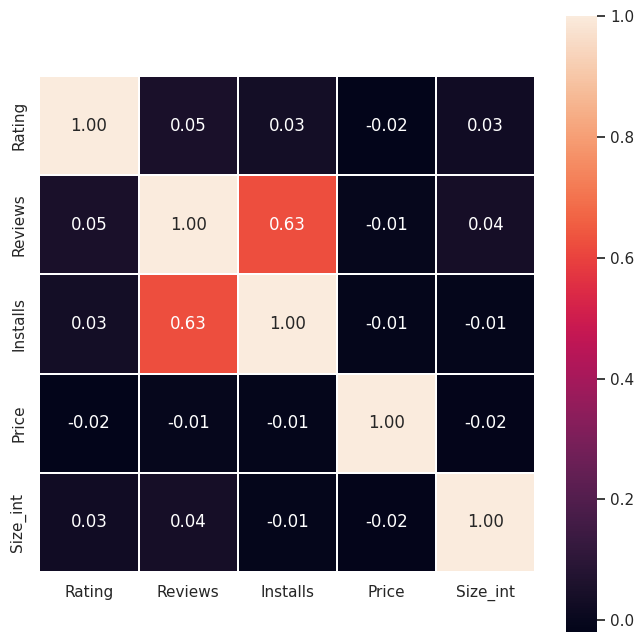

In [241]:
#Corelation with each category to other category by using heat map
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(df2.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

 
Installs and review are highly corelated to each other.

A moderate positive correlation of 0.63 exists between the number of reviews and number of installs. This means that customers tend to download a given app more if it has been reviewed by a larger number of people.

This also means that many active users who download an app usually also leave back a review or feedback.

So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!

# Some important point we get after Data visualization 

## Q5.  What are the top 5 apps on the basis of highest installs?

In [242]:
# What are the top 5 apps on the basis of highest installs?

df = df2.sort_values(by=['Installs'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_int
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,0.0
451,Gmail,COMMUNICATION,4.3,4604483,Varies with device,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,0.0
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device,0.0
3223,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235373,Varies with device,1000000000,Free,0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device,0.0
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065,13M,1000000000,Free,0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up,13.0


##Q6.Top 5 reviewed app by user?

In [243]:
#Top 5 reviewed app by user
df2.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_int
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,0.0
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,0.0
1879,Clash of Clans,GAME,4.6,44893888,98M,100000000,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,98.0


##Q7.  What is the top 5 expensive apps?

In [244]:
# What is the top 5 expensive apps?

df = df2.sort_values(by=['Price'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_int
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,7.3
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000,Paid,399,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,8.7
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0,40M,0,Paid,399,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up,40.0
5362,I Am Rich Pro,FAMILY,4.4,201,2.7M,5000,Paid,399,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up,2.7
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,4.7


##Q8.Now we check top 5 most installed game?

### As before we see the most install category app is 'Game '
 

In [245]:
#  What is the top 5 most installed apps in Game category?
# Top 5 popular game as for highest no. of installation
df = df2[df2['Category'] == 'GAME']
df = df.sort_values(by=['Installs'], ascending=False)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_int
1917,Subway Surfers,GAME,4.5,27725352,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,76.0
1966,Candy Crush Saga,GAME,4.4,22430188,74M,500000000,Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,74.0
1908,My Talking Tom,GAME,4.5,14892469,Varies with device,500000000,Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up,0.0
1920,Temple Run 2,GAME,4.3,8119154,62M,500000000,Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up,62.0
1885,Pou,GAME,4.3,10486018,24M,500000000,Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up,24.0


## Q9.Which 5 apps from the 'FAMILY' category are having the lowest rating?

### As for our analysis we see that the the highest no. of app present from family category but after that with compare of game app the user of family category is likely half of that but still family category less use by user so we do this to know which family app not gives impact




In [246]:
# Which 5 apps from the 'FAMILY' category are having the lowest rating?

df = df2[df2['Category'] == 'FAMILY']
df = df.sort_values(by=['Rating'], ascending=True)
df.head()
#As for rating those app not get good responce frome user
#Those 5 app are in last 5 position frome highest app catagory(Family).

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_int
10324,FE Mechanical Engineering Prep,FAMILY,1.0,2,21M,1000,Free,0,Everyone,Education,"July 27, 2018",5.33.3669,5.0 and up,21.0
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2.0M,50,Paid,1,Everyone,Education,"April 9, 2012",1.0,2.1 and up,2.0
4127,Speech Therapy: F,FAMILY,1.0,1,16M,10,Paid,2,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up,16.0
4905,AC REMOTE UNIVERSAL-PRO,FAMILY,1.6,402,1.7M,100000,Free,0,Everyone,Entertainment,"December 11, 2015",1.0,2.2 and up,1.7
6135,BG TV App,FAMILY,1.7,6,2.9M,100,Free,0,Everyone,Entertainment,"December 21, 2017",1.0,4.1 and up,2.9


# Now take an analysis on user reviews

# Sentiment Analysis (2nd DataSet)
This file contains the result of the sentiment analysis conducted by the dataset creator. It has 64,295 rows of data with the following columns:

App : Name of the app.

Translated_Review: Either the original review in English, or a translated version if the orignal review is in another language.

Sentiment: The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral, or Negative.

Sentiment_Polarity: A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive).

Sentiment_Subjectivity: A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements.

In [247]:
#Second datset
df3=pd.read_csv('/content/drive/MyDrive/EDA Project/User Reviews.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


## Merge 2 data set

In [248]:
#Now we are merging our play store data set and review data set
df4=pd.merge(df2,df3,how='inner',on='App')
df4.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_int,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
22298,Flightradar24 Flight Tracker,TRAVEL_AND_LOCAL,4.3,171889,Varies with device,10000000,Free,0,Everyone,Travel & Local,"July 18, 2018",7.8.0,Varies with device,0.0,NaN,NaN,NaN,NaN
45067,HTC Social Plugin - Facebook,SOCIAL,3.6,13223,2.8M,10000000,Free,0,Mature 17+,Social,"June 8, 2016",8.00.752746,4.4 and up,2.8,Cannot update I forced outdated factory versio...,Negative,-0.19,0.486667
37651,A&E - Watch Full Episodes of TV Shows,FAMILY,4.0,29708,19M,1000000,Free,0,Teen,Entertainment,"July 16, 2018",3.1.4,4.4 and up,19.0,NaN,NaN,NaN,NaN
46445,Anime Avatar Creator: Make Your Own Avatar,LIFESTYLE,4.2,10944,36M,1000000,Free,0,Everyone,Lifestyle,"June 15, 2018",2.0,4.1 and up,36.0,NaN,NaN,NaN,NaN
55782,GMAT Math Flashcards,EDUCATION,4.4,1769,Varies with device,100000,Free,0,Everyone,Education,"July 11, 2018",Varies with device,Varies with device,0.0,Great review GMAT,Positive,0.80,0.750000


Here we just merge our dataset so that we know which review belong to which category and app.It just merge data set off playstore and user review based on app and here we use inner join.

##Q10. Top 5 app which get Most Translated_Review?

In [249]:
#Most Translated_Review app in the playstore

app=df4.groupby(['App','Category'])['Translated_Review'].count().reset_index()
app=pd.DataFrame(app)
app=app.sort_values(by=['Translated_Review'], ascending=False)
app.head(5)

,App,Category,Translated_Review
268,Bowmasters,GAME,312
966,Helix Jump,GAME,273
119,Angry Birds Classic,GAME,273
342,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,254
357,Candy Crush Saga,GAME,240


### As for the datset we see that people give theie reaction in written on  Bowmasters,Helix Jump,Angry Birds Classic app. The written review help the developer to know how the app work and what type of change needed as for user need.

### And the second thing we notice that most of the reaction('translated_Review') are from Game category.

### People are prefer to give their opinion on gaming app and then people prefer to give their opinion on health app.

## This show that people take much more interest in Game category app as compare to other.


#Q11. Top 5 category which get most translatated  review?

In [250]:
#Most Translated_Review category basis

category=df4.groupby(['Category'])['Translated_Review'].count().reset_index()
category=pd.DataFrame(category)

category=category.sort_values(by=['Translated_Review'], ascending=False)
 
category.head(5)

,Category,Translated_Review
14,GAME,5947
11,FAMILY,3277
15,HEALTH_AND_FITNESS,2249
7,DATING,1715
30,TRAVEL_AND_LOCAL,1692


From the above table we see that the highest no. of user give their opinion as writen('Translated_Review')in game app the family and health app

#Sentiment Analysis on Category basis


##V9.Sentiment Analysis on different Category basis?

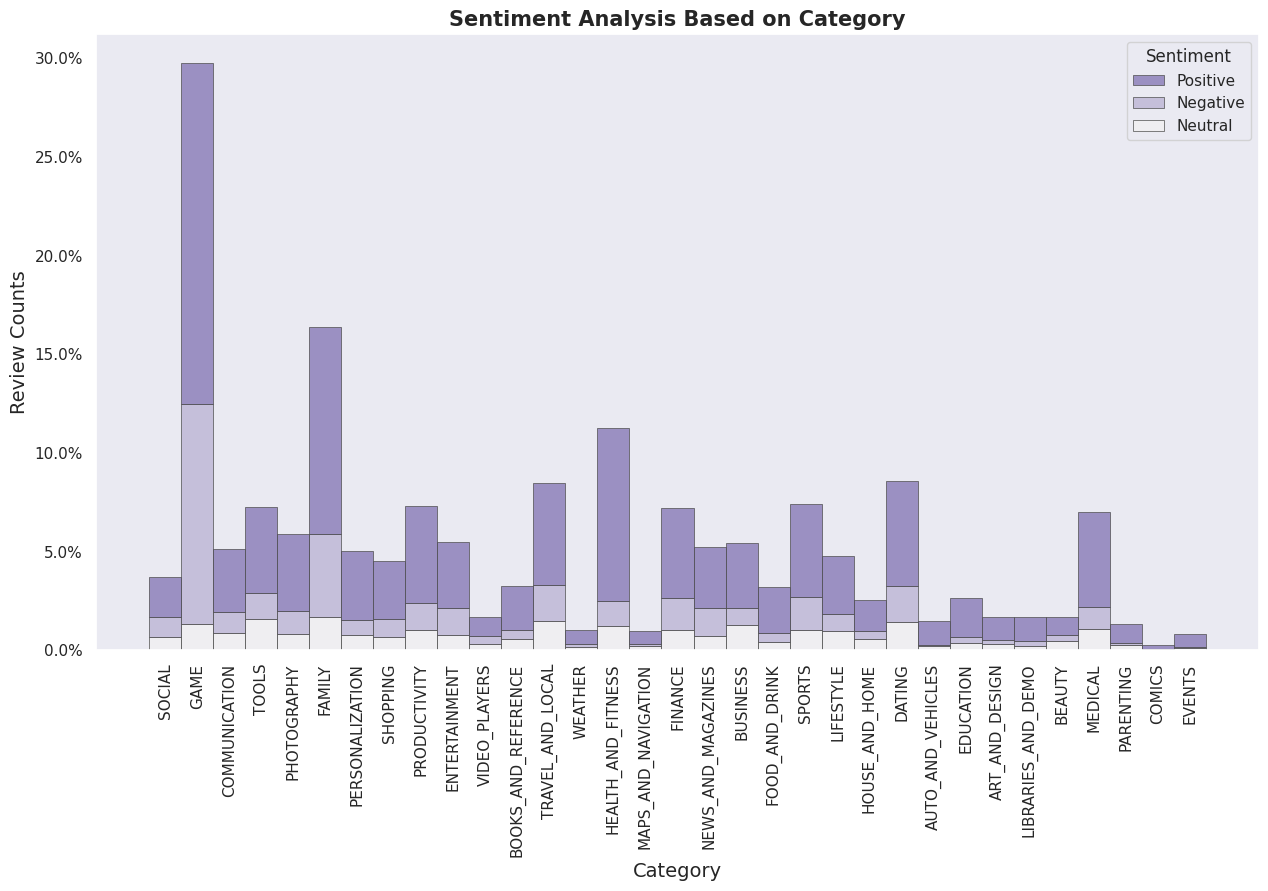

In [251]:
from matplotlib.ticker import PercentFormatter

f = plt.figure(figsize=(15,8))
ax = f.add_subplot(1,1,1)

sns.histplot(
    data=df4,
    x="Category", hue="Sentiment",
    bins=34,
    ax=ax, 
    stat="count",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    legend=True
    )


ax.set_title("Sentiment Analysis Based on Category",fontsize=15,fontweight='bold')
plt.xticks(rotation='vertical')
ax.set_xlabel("Category",fontsize=14)
ax.set_ylabel("Review Counts",fontsize=14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(20000))
sns.set(style="ticks")
plt.grid()
plt.show()

Family, Sports and Health & Fitness apps perform the best, Having more than 50% positive reviews and Game and Social apps perform decent leading to 50% positive and 50% negative.

The no. of review of game is much more higher in compare to other.

#Conclusion
 

### The Google Play Store Apps report provides some useful details regarding the trending of the apps in the play store. As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY but still used most. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.

### Other than that, the charts shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs. The size and price shouldn't reflect that apps with high rating are mostly big in size and pricy as by looking at the graphs they are most probably are due to some minority. Futhermore, most of the apps that are having high amount of reviews are from the categories of SOCIAL, COMMUNICATION and GAME like Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Clash of Clans ,google apps etc.

### Eventhough apps from the categories like GAME, SOCIAL, COMMUNICATION and TOOL of having the highest amount of installs, rating and reviews are reflecting the current trend of Android users, they are not even appearing as category in the top 5 most expensive apps in the store . As a conclsuion, we learnt that the current trend in the Android market are mostly from these categories which either assisting, communicating or entertaining apps.

### Some important point:-

###Average rating of (active) apps on Google Play Store is 4.17.

### If we see individually app wise the communicatation app like facebook and whatsup get highly reviewed app it shown that people regulary active on that and give there feedback also on that.

###.Medical and Family apps are the most expensive and even extend upto 80$.

###.Users tend to download a given app more if it has been reviewed by a large number of people.

###.More than half users rate Family, Sports and Health & Fitness apps positively. Apps for games and social media get mixed reviews, with 50 percent positive and 50 percent negative responses.



